 # PROJECT TITLE 
## Climate-Driven Landslide Susceptibility Prediction in India: An SNN-Based Risk Assessment Framework for Disaster Management 

### Project Description
This project implements a machine learning-based landslide prediction system using Superposable Neural Networks (SNNs) for climate risk assessment in India. The system integrates geospatial, climatic, and topographic data to predict landslide susceptibility at high spatial resolution (100m), focusing on climate change impacts and early warning capabilitie s

### Problem Statement
India faces severe landslide threats due to complex topography, monsoon rainfall patterns, and climate change impacts. With approximately 30% of India's landmass covered by mountain ranges and 22 states affected by landslides, there is an urgent need for accurate prediction systems to mitigate risks and save lives. This project develops a Spatial Neural Network (SNN) model for landslide susceptibility prediction as a climate risk management tool.

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras geopandas folium plotly jupyterlab xgboost lightgbm rasterio earthpy

In [3]:
#imports and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

landslide_inventory = pd.read_csv(r"C:\Users\keert\Downloads\landslide_inventory_india.csv")
susceptibility_data = pd.read_csv(r"C:\Users\keert\Downloads\landslide_susceptibility_features.csv")
climate_data = pd.read_csv(r"C:\Users\keert\Downloads\climate_data_sample.csv")
metadata = pd.read_csv(r"C:\Users\keert\Downloads\dataset_metadata.csv")

print("Landslide Inventory:", landslide_inventory.shape)
print("Susceptibility Features:", susceptibility_data.shape)
print("Climate Data:", climate_data.shape)


Landslide Inventory: (1000, 12)
Susceptibility Features: (5000, 32)
Climate Data: (1000, 11)


## Phase 1: Exploratory Data Analysis


In [6]:
#basic data exploration
def explore_dataset(df, name):
    print(f"\n{'='*40}\nExploring {name}\n{'='*40}")
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))
    print("\nMissing values:\n", df.isnull().sum())
    print("\nData types:\n", df.dtypes)
    display(df.describe())
#Explore each
explore_dataset(landslide_inventory, "Landslide Inventory")
explore_dataset(susceptibility_data, "Susceptibility Features")
explore_dataset(climate_data, "Climate Data")


Exploring Landslide Inventory
Shape: (1000, 12)
Columns: ['Landslide_ID', 'Latitude', 'Longitude', 'State', 'District', 'Date_Occurred', 'Landslide_Type', 'Area_sqm', 'Casualties', 'Damage_Level', 'Trigger', 'Validation_Status']

Missing values:
 Landslide_ID         0
Latitude             0
Longitude            0
State                0
District             0
Date_Occurred        0
Landslide_Type       0
Area_sqm             0
Casualties           0
Damage_Level         0
Trigger              0
Validation_Status    0
dtype: int64

Data types:
 Landslide_ID          object
Latitude             float64
Longitude            float64
State                 object
District              object
Date_Occurred         object
Landslide_Type        object
Area_sqm             float64
Casualties             int64
Damage_Level          object
Trigger               object
Validation_Status     object
dtype: object


,Latitude,Longitude,Area_sqm,Casualties
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.659851,79.313997,4894.269443,0.279000
std,9.059983,6.550674,4821.472104,1.144757
min,8.049659,72.004717,2.990588,0.000000
25%,14.304724,74.452731,1417.038198,0.000000
50%,20.505607,76.384983,3491.857984,0.000000
75%,31.381863,84.153933,6878.852313,0.000000
max,34.992248,94.987688,38617.647610,10.000000



Exploring Susceptibility Features
Shape: (5000, 32)
Columns: ['Point_ID', 'Latitude', 'Longitude', 'Elevation', 'Slope', 'Aspect', 'Curvature', 'TRI', 'TPI', 'Annual_Precipitation', 'Monsoon_Precipitation', 'Max_Daily_Precipitation', 'Antecedent_Rainfall_7d', 'Antecedent_Rainfall_15d', 'Antecedent_Rainfall_30d', 'Mean_Temperature', 'Min_Temperature', 'Max_Temperature', 'Temperature_Range', 'Lithology', 'Fault_Density', 'Distance_to_Fault', 'NDVI', 'Land_Use', 'Forest_Cover', 'Distance_to_Road', 'Road_Density', 'Slope_Precipitation', 'Elevation_Slope', 'Aspect_Relief', 'Susceptibility_Score', 'Susceptibility_Class']

Missing values:
 Point_ID                   0
Latitude                   0
Longitude                  0
Elevation                  0
Slope                      0
Aspect                     0
Curvature                  0
TRI                        0
TPI                        0
Annual_Precipitation       0
Monsoon_Precipitation      0
Max_Daily_Precipitation    0
Antecedent

,Latitude,Longitude,Elevation,Slope,Aspect,Curvature,TRI,TPI,Annual_Precipitation,Monsoon_Precipitation,...,NDVI,Land_Use,Forest_Cover,Distance_to_Road,Road_Density,Slope_Precipitation,Elevation_Slope,Aspect_Relief,Susceptibility_Score,Susceptibility_Class
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,22.428345,82.603950,4451.69284,14.950120,177.593354,-0.000460,24.760692,0.125156,1162.134160,870.706340,...,0.639782,2.82860,0.235010,994.215220,0.508294,17.383588,7.478108,-0.001217,3.216858,1.943000
std,8.326915,8.354041,2539.44229,14.550468,104.391478,0.100344,14.574156,10.113176,1056.377526,801.159486,...,0.178425,1.77861,0.190855,983.722842,0.500495,27.842863,9.439704,0.071984,1.778352,1.121785
min,8.004255,68.002851,0.94000,0.000000,0.000000,-0.360200,0.000000,-35.900000,0.000000,0.000000,...,0.115000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300200,-1.570000,0.000000
25%,15.077283,75.511523,2222.13500,4.390000,85.710000,-0.068100,12.105000,-6.842500,335.500000,249.375000,...,0.511000,1.00000,0.081000,290.875000,0.145000,1.980000,1.330000,-0.037325,1.980000,1.000000
50%,22.320642,82.564843,4508.51000,10.530000,175.690000,-0.000200,24.435000,0.160000,843.750000,623.150000,...,0.655000,2.00000,0.188500,698.300000,0.358500,7.050000,4.110000,-0.000400,3.050000,2.000000
75%,29.604312,89.863981,6614.64500,20.742500,267.727500,0.066900,37.502500,7.060000,1678.475000,1242.850000,...,0.779000,4.00000,0.348000,1374.000000,0.707250,21.070000,9.920000,0.035725,4.260000,3.000000
max,36.984131,96.999769,8847.62000,90.000000,359.950000,0.360300,50.000000,34.100000,4000.000000,3595.700000,...,0.992000,7.00000,0.942000,7899.700000,5.318000,320.910000,85.420000,0.339200,9.720000,4.000000



Exploring Climate Data
Shape: (1000, 11)
Columns: ['Station_ID', 'Latitude', 'Longitude', 'Year', 'Month', 'Temperature_Mean', 'Temperature_Min', 'Temperature_Max', 'Precipitation', 'Humidity', 'Wind_Speed']

Missing values:
 Station_ID          0
Latitude            0
Longitude           0
Year                0
Month               0
Temperature_Mean    0
Temperature_Min     0
Temperature_Max     0
Precipitation       0
Humidity            0
Wind_Speed          0
dtype: int64

Data types:
 Station_ID           object
Latitude            float64
Longitude           float64
Year                  int64
Month                 int64
Temperature_Mean    float64
Temperature_Min     float64
Temperature_Max     float64
Precipitation       float64
Humidity            float64
Wind_Speed          float64
dtype: object


,Latitude,Longitude,Year,Month,Temperature_Mean,Temperature_Min,Temperature_Max,Precipitation,Humidity,Wind_Speed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.401332,79.362520,2015.756000,6.484000,20.307400,15.307400,28.307400,78.085000,67.215300,8.630100
std,7.604716,5.293395,3.760666,3.456833,6.438489,6.438489,6.438489,130.027532,14.891339,3.755975
min,13.865000,72.907100,2010.000000,1.000000,3.300000,-1.700000,11.300000,0.100000,40.000000,2.000000
25%,16.560900,74.458000,2012.000000,3.000000,15.975000,10.975000,23.975000,10.200000,54.475000,5.400000
50%,26.941800,80.632200,2016.000000,6.000000,20.100000,15.100000,28.100000,28.300000,69.700000,8.900000
75%,30.382700,81.863200,2019.000000,9.000000,24.900000,19.900000,32.900000,84.075000,78.300000,11.900000
max,36.530000,94.721500,2022.000000,12.000000,38.500000,33.500000,46.500000,1000.000000,94.900000,15.000000


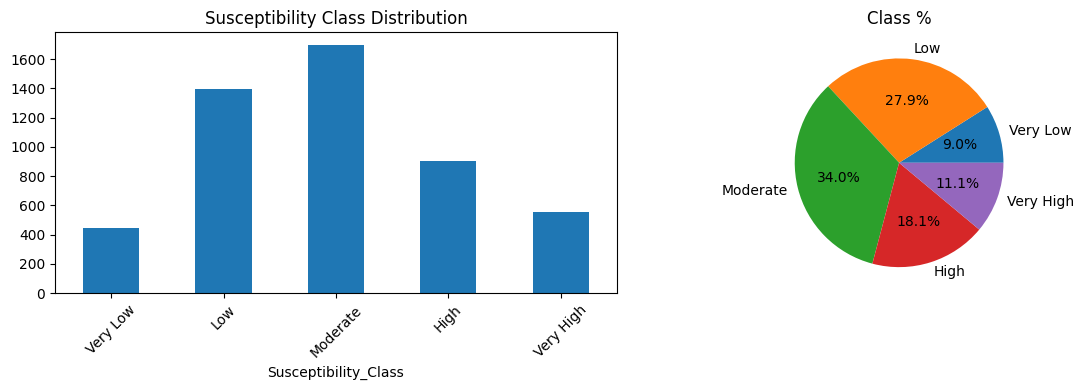

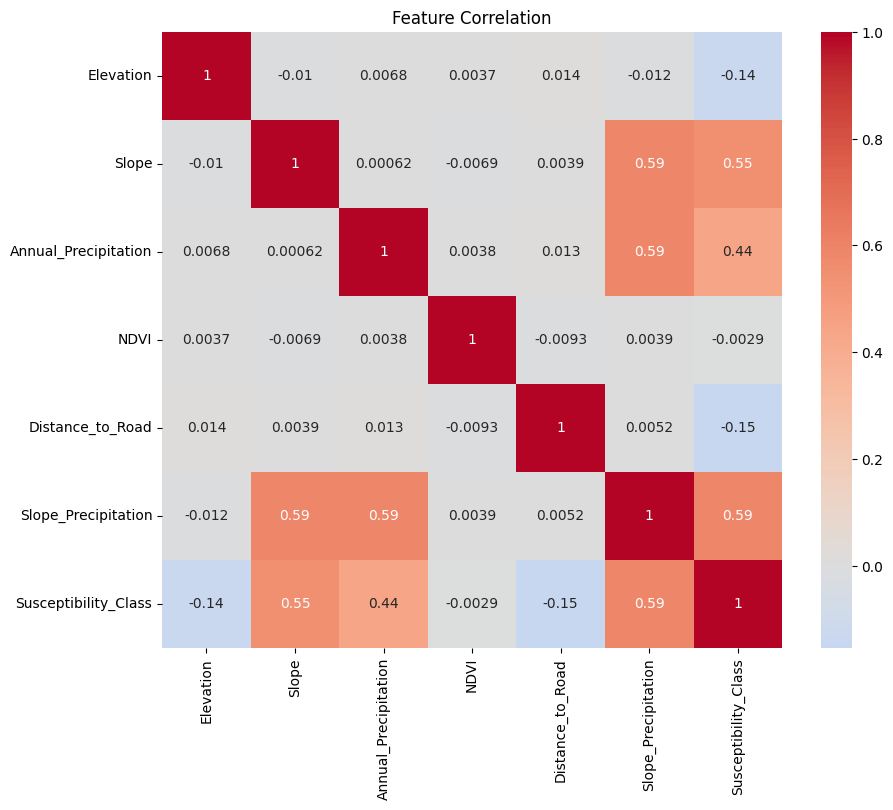

In [8]:
#Visualize Class Distribution & Correlations
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
susceptibility_data['Susceptibility_Class'].value_counts().sort_index().plot(kind='bar')
plt.title('Susceptibility Class Distribution')
plt.xticks(range(5), ['Very Low','Low','Moderate','High','Very High'], rotation=45)
plt.subplot(1,2,2)
plt.pie(susceptibility_data['Susceptibility_Class'].value_counts().sort_index(),
labels=['Very Low','Low','Moderate','High','Very High'], autopct='%1.1f%%')
plt.title('Class %')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
corr = susceptibility_data[['Elevation','Slope','Annual_Precipitation','NDVI','Distance_to_Road','Slope_Precipitation','Susceptibility_Class']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation')
plt.show()